In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, QuantileTransformer
from sklearn.impute import SimpleImputer
import numpy as np

In [2]:
import sys
import os
from os.path import dirname
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
sys.path.append(dirname('../src'))
from src.utils import utils
data = utils.load_df("../Data/feature_eng.pkl")
data.head(5)

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,...,E889,num_E889,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label
0,1,M,25,12.5,0,0,1,9,150.0,108.0,...,1,25,12.5,1,25,12.5,1,25,12.5,0
1,2,M,24,12.0,0,0,1,4,158.0,109.0,...,1,24,12.0,1,24,12.0,1,24,12.0,0
2,3,M,21,10.5,0,0,1,1,253.0,253.0,...,1,21,10.5,1,21,10.5,1,21,10.5,0
3,4,M,20,10.0,0,0,1,4,155.75,80.0,...,1,20,10.0,1,20,10.0,1,20,10.0,1
4,1,M,4,2.0,0,0,0,NaN,NaN,NaN,...,1,4,2.0,1,4,2.0,1,4,2.0,0


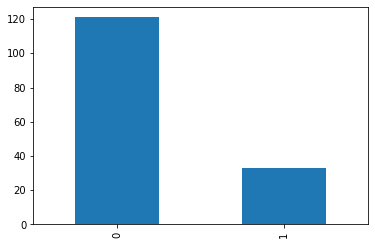

In [3]:
data['label'].value_counts().plot.bar()

In [4]:
data[data['sum_num_consultas']==0]

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,...,E889,num_E889,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label
6,3,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
27,5,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
28,6,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
29,7,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
56,7,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
57,8,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1
65,2,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
66,3,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
67,4,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,0
68,5,,0,0.0,0,0,0,NaN,NaN,NaN,...,0,NaN,NaN,0,NaN,NaN,0,NaN,NaN,1


- Eliminando filas que no aportan información

In [5]:
data = data[data['sum_num_consultas']>0]
data = data.reset_index()
data = data.drop(columns=['index'])
data

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,...,E889,num_E889,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label
0,1,M,25,12.5,0,0,1,9,150.0,108.0,...,1,25,12.5,1,25,12.5,1,25,12.5,0
1,2,M,24,12.0,0,0,1,4,158.0,109.0,...,1,24,12.0,1,24,12.0,1,24,12.0,0
2,3,M,21,10.5,0,0,1,1,253.0,253.0,...,1,21,10.5,1,21,10.5,1,21,10.5,0
3,4,M,20,10.0,0,0,1,4,155.75,80.0,...,1,20,10.0,1,20,10.0,1,20,10.0,1
4,1,M,4,2.0,0,0,0,NaN,NaN,NaN,...,1,4,2.0,1,4,2.0,1,4,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2,F,15,7.5,1,0,1,3,146.666667,140.0,...,1,2,1.0,1,2,1.0,1,2,1.0,1
125,1,F,10,5.0,0,0,1,2,118.5,113.0,...,1,10,5.0,1,10,5.0,1,10,5.0,0
126,2,F,5,2.5,0,0,0,NaN,NaN,NaN,...,1,5,2.5,1,5,2.5,1,5,2.5,0
127,3,F,6,3.0,0,0,1,1,118.0,118.0,...,1,6,3.0,1,6,3.0,1,6,3.0,0


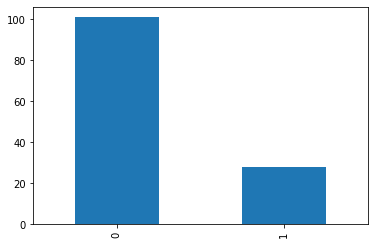

In [6]:
data['label'].value_counts().plot.bar()

- Eliminando columnas que no aportan información

In [7]:
subset_df = data.loc[:, data.isnull().all()]
col_null = list(subset_df.columns)
col_null

['num_med_ldl',
 'avg_ldl',
 'min_ldl',
 'max_ldl',
 'num_med_plaquetas',
 'avg_plaquetas',
 'min_plaquetas',
 'max_plaquetas',
 'avg_imc_zscore',
 'num_med_tuberculosis',
 'avg_tuberculosis',
 'num_med_ot_enf_bacterianas',
 'avg_ot_enf_bacterianas',
 'num_med_inf_trans_pred_sexual',
 'avg_inf_trans_pred_sexual',
 'num_med_rickettsiosis_y_ot_enf__protozoarios',
 'avg_rickettsiosis_y_ot_enf__protozoarios',
 'num_med_tumores_malig_labio_bucal_faringe',
 'avg_tumores_malig_labio_bucal_faringe',
 'num_med_tumores_malig_organos',
 'avg_tumores_malig_organos',
 'num_med_tumores_malig_org_genitourinarios',
 'avg_tumores_malig_org_genitourinarios',
 'num_med_tumores_malig_otros_sitios_ne',
 'avg_tumores_malig_otros_sitios_ne',
 'num_med_tumores_malig_tejido_linf_org_hematop',
 'avg_tumores_malig_tejido_linf_org_hematop',
 'num_med_tumores_comp_incierto_desc',
 'avg_tumores_comp_incierto_desc',
 'num_med_enf_sangre_org_hematop',
 'avg_enf_sangre_org_hematop',
 'num_med_desnutricion_ot_deficienc

In [8]:
data.drop(col_null, axis=1, inplace=True)
list(data.columns)

['ventana',
 'sexo',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'renal',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',
 'plaquetas',
 'creatinina',
 'num_med_creatinina',
 'avg_creatinina',
 'min_creatinina',
 'max_creatinina',
 'acido_urico',
 'num_med_acido_urico',
 'avg_acido_urico',
 'min_acido_urico',
 'max_acido_urico

In [10]:
data.shape

(129, 984)

In [12]:
data[pd.isna(data['imc_range'])]

,ventana,sexo,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,...,E889,num_E889,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label
91,3,M,1,0.5,1,0,0,NaN,NaN,NaN,...,1,1,0.5,1,1,0.5,1,1,0.5,0
92,4,M,1,0.5,1,0,0,NaN,NaN,NaN,...,1,1,0.5,1,1,0.5,1,1,0.5,0


In [13]:
data['imc_range'] = data['imc_range'].fillna('Sin dato')
data['sexo'] = data['sexo'].fillna('Sin dato')

In [14]:
df_st = data[['sexo','imc_range']]
display(df_st.head(5))
df1 = data.drop(['sexo','imc_range'], axis=1)
display(df1.head(5))

,sexo,imc_range
0,M,Obesidad Grado 1
1,M,Obesidad Grado 1
2,M,Obesidad Grado 1
3,M,Obesidad Grado 1
4,M,Obesidad Grado 2


,ventana,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,max_preglucosa,...,E889,num_E889,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label
0,1,25,12.5,0,0,1,9,150.0,108.0,373.0,...,1,25,12.5,1,25,12.5,1,25,12.5,0
1,2,24,12.0,0,0,1,4,158.0,109.0,253.0,...,1,24,12.0,1,24,12.0,1,24,12.0,0
2,3,21,10.5,0,0,1,1,253.0,253.0,253.0,...,1,21,10.5,1,21,10.5,1,21,10.5,0
3,4,20,10.0,0,0,1,4,155.75,80.0,210.0,...,1,20,10.0,1,20,10.0,1,20,10.0,1
4,1,4,2.0,0,0,0,NaN,NaN,NaN,NaN,...,1,4,2.0,1,4,2.0,1,4,2.0,0


### Imputaciones

In [18]:
col = list(df1.columns)
col

['ventana',
 'sum_num_consultas',
 'avg_num_consultas_by_year',
 'dm',
 'renal',
 'preglucosa',
 'num_med_preglucosa',
 'avg_preglucosa',
 'min_preglucosa',
 'max_preglucosa',
 'postglucosa',
 'num_med_postglucosa',
 'avg_postglucosa',
 'min_postglucosa',
 'max_postglucosa',
 'colesterol',
 'num_med_colesterol',
 'avg_colesterol',
 'min_colesterol',
 'max_colesterol',
 'trigliceridos',
 'num_med_trigliceridos',
 'avg_trigliceridos',
 'min_trigliceridos',
 'max_trigliceridos',
 'hdl',
 'num_med_hdl',
 'avg_hdl',
 'min_hdl',
 'max_hdl',
 'ldl',
 'presion_arterial',
 'num_med_presion_a',
 'avg_sistolica_a',
 'min_sistolica_a',
 'max_sistolica_a',
 'avg_diastolica_a',
 'min_diastolica_a',
 'max_diastolica_a',
 'hba1c',
 'num_med_hba1c',
 'avg_hba1c',
 'min_hba1c',
 'max_hba1c',
 'plaquetas',
 'creatinina',
 'num_med_creatinina',
 'avg_creatinina',
 'min_creatinina',
 'max_creatinina',
 'acido_urico',
 'num_med_acido_urico',
 'avg_acido_urico',
 'min_acido_urico',
 'max_acido_urico',
 'urea

In [16]:
# Imputation
my_imputer = SimpleImputer()
d_inp = pd.DataFrame(my_imputer.fit_transform(df1))
d_inp

,0,1,2,3,4,5,6,7,8,9,...,972,973,974,975,976,977,978,979,980,981
0,1.0,25.0,12.5,0.0,0.0,1.0,9.000000,150.000000,108.000000,373.000000,...,1.0,25.0,12.5,1.0,25.0,12.5,1.0,25.0,12.5,0.0
1,2.0,24.0,12.0,0.0,0.0,1.0,4.000000,158.000000,109.000000,253.000000,...,1.0,24.0,12.0,1.0,24.0,12.0,1.0,24.0,12.0,0.0
2,3.0,21.0,10.5,0.0,0.0,1.0,1.000000,253.000000,253.000000,253.000000,...,1.0,21.0,10.5,1.0,21.0,10.5,1.0,21.0,10.5,0.0
3,4.0,20.0,10.0,0.0,0.0,1.0,4.000000,155.750000,80.000000,210.000000,...,1.0,20.0,10.0,1.0,20.0,10.0,1.0,20.0,10.0,1.0
4,1.0,4.0,2.0,0.0,0.0,0.0,3.941176,157.012007,125.188235,199.752941,...,1.0,4.0,2.0,1.0,4.0,2.0,1.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2.0,15.0,7.5,1.0,0.0,1.0,3.000000,146.666667,140.000000,160.000000,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
125,1.0,10.0,5.0,0.0,0.0,1.0,2.000000,118.500000,113.000000,124.000000,...,1.0,10.0,5.0,1.0,10.0,5.0,1.0,10.0,5.0,0.0
126,2.0,5.0,2.5,0.0,0.0,0.0,3.941176,157.012007,125.188235,199.752941,...,1.0,5.0,2.5,1.0,5.0,2.5,1.0,5.0,2.5,0.0
127,3.0,6.0,3.0,0.0,0.0,1.0,1.000000,118.000000,118.000000,118.000000,...,1.0,6.0,3.0,1.0,6.0,3.0,1.0,6.0,3.0,0.0


In [17]:
d_inp.shape

(129, 982)

In [19]:
d_inp.columns = col
d_inp

,ventana,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,max_preglucosa,...,E889,num_E889,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label
0,1.0,25.0,12.5,0.0,0.0,1.0,9.000000,150.000000,108.000000,373.000000,...,1.0,25.0,12.5,1.0,25.0,12.5,1.0,25.0,12.5,0.0
1,2.0,24.0,12.0,0.0,0.0,1.0,4.000000,158.000000,109.000000,253.000000,...,1.0,24.0,12.0,1.0,24.0,12.0,1.0,24.0,12.0,0.0
2,3.0,21.0,10.5,0.0,0.0,1.0,1.000000,253.000000,253.000000,253.000000,...,1.0,21.0,10.5,1.0,21.0,10.5,1.0,21.0,10.5,0.0
3,4.0,20.0,10.0,0.0,0.0,1.0,4.000000,155.750000,80.000000,210.000000,...,1.0,20.0,10.0,1.0,20.0,10.0,1.0,20.0,10.0,1.0
4,1.0,4.0,2.0,0.0,0.0,0.0,3.941176,157.012007,125.188235,199.752941,...,1.0,4.0,2.0,1.0,4.0,2.0,1.0,4.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2.0,15.0,7.5,1.0,0.0,1.0,3.000000,146.666667,140.000000,160.000000,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0
125,1.0,10.0,5.0,0.0,0.0,1.0,2.000000,118.500000,113.000000,124.000000,...,1.0,10.0,5.0,1.0,10.0,5.0,1.0,10.0,5.0,0.0
126,2.0,5.0,2.5,0.0,0.0,0.0,3.941176,157.012007,125.188235,199.752941,...,1.0,5.0,2.5,1.0,5.0,2.5,1.0,5.0,2.5,0.0
127,3.0,6.0,3.0,0.0,0.0,1.0,1.000000,118.000000,118.000000,118.000000,...,1.0,6.0,3.0,1.0,6.0,3.0,1.0,6.0,3.0,0.0


In [20]:
df_st

,sexo,imc_range
0,M,Obesidad Grado 1
1,M,Obesidad Grado 1
2,M,Obesidad Grado 1
3,M,Obesidad Grado 1
4,M,Obesidad Grado 2
...,...,...
124,F,Sobrepeso
125,F,Peso normal
126,F,Sobrepeso
127,F,Sobrepeso


In [21]:
df = pd.merge(d_inp, df_st, left_index=True, right_index=True)  
df

,ventana,sum_num_consultas,avg_num_consultas_by_year,dm,renal,preglucosa,num_med_preglucosa,avg_preglucosa,min_preglucosa,max_preglucosa,...,avg_E889,E89,num_E89,avg_E89,E90,num_E90,avg_E90,label,sexo,imc_range
0,1.0,25.0,12.5,0.0,0.0,1.0,9.000000,150.000000,108.000000,373.000000,...,12.5,1.0,25.0,12.5,1.0,25.0,12.5,0.0,M,Obesidad Grado 1
1,2.0,24.0,12.0,0.0,0.0,1.0,4.000000,158.000000,109.000000,253.000000,...,12.0,1.0,24.0,12.0,1.0,24.0,12.0,0.0,M,Obesidad Grado 1
2,3.0,21.0,10.5,0.0,0.0,1.0,1.000000,253.000000,253.000000,253.000000,...,10.5,1.0,21.0,10.5,1.0,21.0,10.5,0.0,M,Obesidad Grado 1
3,4.0,20.0,10.0,0.0,0.0,1.0,4.000000,155.750000,80.000000,210.000000,...,10.0,1.0,20.0,10.0,1.0,20.0,10.0,1.0,M,Obesidad Grado 1
4,1.0,4.0,2.0,0.0,0.0,0.0,3.941176,157.012007,125.188235,199.752941,...,2.0,1.0,4.0,2.0,1.0,4.0,2.0,0.0,M,Obesidad Grado 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,2.0,15.0,7.5,1.0,0.0,1.0,3.000000,146.666667,140.000000,160.000000,...,1.0,1.0,2.0,1.0,1.0,2.0,1.0,1.0,F,Sobrepeso
125,1.0,10.0,5.0,0.0,0.0,1.0,2.000000,118.500000,113.000000,124.000000,...,5.0,1.0,10.0,5.0,1.0,10.0,5.0,0.0,F,Peso normal
126,2.0,5.0,2.5,0.0,0.0,0.0,3.941176,157.012007,125.188235,199.752941,...,2.5,1.0,5.0,2.5,1.0,5.0,2.5,0.0,F,Sobrepeso
127,3.0,6.0,3.0,0.0,0.0,1.0,1.000000,118.000000,118.000000,118.000000,...,3.0,1.0,6.0,3.0,1.0,6.0,3.0,0.0,F,Sobrepeso


In [22]:
X = df.loc[:, df.columns != 'label']
Y = df[["label"]]

In [23]:
print(X.shape)
print(Y.shape)

(129, 983)
(129, 1)


In [24]:
transformers = [('genero', OneHotEncoder(),['sexo'])]
col_trans_sexo = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
#este no se corre mas que una sola vez porque es el que calibra
col_trans_sexo.fit(df)
col_trans_sexo.get_feature_names()

['genero__x0_F', 'genero__x0_M']

In [25]:
sexo_transformada = col_trans_sexo.transform(df)
df_sexo = pd.DataFrame(sexo_transformada)
df_sexo.columns = col_trans_sexo.get_feature_names()
df_sexo.head()
df_sexo.replace(np.nan,0)

,genero__x0_F,genero__x0_M
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
124,1.0,0.0
125,1.0,0.0
126,1.0,0.0
127,1.0,0.0


In [26]:
transformers = [('imc_r', OneHotEncoder(),['imc_range'])]
col_trans_imc_range = ColumnTransformer(transformers, remainder="drop", n_jobs=-1, verbose=True)
#este no se corre mas que una sola vez porque es el que calibra
col_trans_imc_range.fit(df)
col_trans_imc_range.get_feature_names()

['imc_r__x0_Bajo peso',
 'imc_r__x0_Obesidad Grado 1',
 'imc_r__x0_Obesidad Grado 2',
 'imc_r__x0_Obesidad Grado 3',
 'imc_r__x0_Peso normal',
 'imc_r__x0_Sin dato',
 'imc_r__x0_Sobrepeso']

In [27]:
imc_range_transformada = col_trans_imc_range.transform(df)
df_imc_range = pd.DataFrame(imc_range_transformada.toarray())
df_imc_range.columns = col_trans_imc_range.get_feature_names()
df_imc_range.head()
df_imc_range.replace(np.nan,0)

,imc_r__x0_Bajo peso,imc_r__x0_Obesidad Grado 1,imc_r__x0_Obesidad Grado 2,imc_r__x0_Obesidad Grado 3,imc_r__x0_Peso normal,imc_r__x0_Sin dato,imc_r__x0_Sobrepeso
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
124,0.0,0.0,0.0,0.0,0.0,0.0,1.0
125,0.0,0.0,0.0,0.0,1.0,0.0,0.0
126,0.0,0.0,0.0,0.0,0.0,0.0,1.0
127,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [28]:
print(X.shape)
print(df_imc_range.shape)
print(df_sexo.shape)

(129, 983)
(129, 7)
(129, 2)


- Uniendo onehotencoder

In [29]:
X = pd.concat([X, df_sexo, df_imc_range], axis= 1)
X.shape

(129, 992)

In [30]:
X.dtypes

ventana                       float64
sum_num_consultas             float64
avg_num_consultas_by_year     float64
dm                            float64
renal                         float64
                               ...   
imc_r__x0_Obesidad Grado 2    float64
imc_r__x0_Obesidad Grado 3    float64
imc_r__x0_Peso normal         float64
imc_r__x0_Sin dato            float64
imc_r__x0_Sobrepeso           float64
Length: 992, dtype: object

In [31]:
print(Y.size)
Y = Y.astype(int)

129


In [38]:
X.drop(['sexo','imc_range'], axis=1, inplace=True)

In [40]:
X.to_csv("../Data/X.csv")

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=4)

In [42]:
# Parámetros para la mejor selección de variables
grid_param = {
    'n_estimators': [100, 150],
    'min_samples_split': [2, 5, 7, 10,15]
}

#classifier = RandomForestClassifier()
classifier = RandomForestClassifier(oob_score=True, random_state=1234)

#Prepareción del GridSearch
gd_sr = GridSearchCV(estimator=classifier,
                     param_grid=grid_param,
                     scoring='precision',
                     cv=2)

In [43]:
#Fit del grid search con r
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=2, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=True, random_state=1234,
                                 

In [44]:
# mejor configuración 
gd_sr.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=1234,
                       verbose=0, warm_start=False)

In [45]:
gd_sr.best_estimator_.n_features_

990

In [46]:
gd_sr.best_estimator_.oob_score_

0.7444444444444445

### Importancia de variables

In [47]:
best_rf = gd_sr.best_estimator_
best_rf.feature_importances_

array([2.76832554e-02, 7.07854031e-03, 5.12437694e-03, 4.12010939e-03,
       0.00000000e+00, 3.33898346e-03, 2.91184052e-02, 8.57478154e-03,
       1.99560416e-02, 1.77691203e-02, 0.00000000e+00, 0.00000000e+00,
       1.46172324e-03, 9.96681750e-04, 1.26913956e-03, 0.00000000e+00,
       8.09048706e-03, 5.16667579e-03, 5.53557212e-04, 6.44841270e-04,
       2.11860208e-04, 5.77065855e-03, 1.53719487e-03, 2.49499633e-03,
       3.04125767e-03, 6.25000000e-04, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.05312957e-02, 1.62594093e-02, 1.10704142e-02, 1.04276337e-02,
       1.35351752e-02, 6.63552610e-03, 6.71677171e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 2.13230585e-03, 1.37378777e-03,
       3.54589386e-03, 5.92296017e-03, 5.09775691e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 7.10707676e-04, 0.00000000e+00,
      

In [48]:
feature_importance = pd.DataFrame({'importance': best_rf.feature_importances_,
                                  'feature': X.columns.values})

In [49]:
importancias = feature_importance.sort_values(by="importance", ascending=False)

In [50]:
pd.set_option('display.max_rows', importancias.shape[0]+1)
importancias

,importance,feature
92,0.030296,avg_vent_entre_consul
6,0.029118,num_med_preglucosa
0,0.027683,ventana
67,0.026676,avg_altura
77,0.024549,avg_edad
78,0.024380,min_edad
94,0.024337,max_dif_vent_entre_consul
93,0.022247,min_dif_vent_entre_consul
88,0.021327,min_dif_imc_calculado
87,0.020859,avg_dif_imc_calculado


In [53]:
col_imp = list(importancias[importancias['importance']>0]['feature'])
col_imp.append('label')
col_imp

['avg_vent_entre_consul',
 'num_med_preglucosa',
 'ventana',
 'avg_altura',
 'avg_edad',
 'min_edad',
 'max_dif_vent_entre_consul',
 'min_dif_vent_entre_consul',
 'min_dif_imc_calculado',
 'avg_dif_imc_calculado',
 'max_altura',
 'min_preglucosa',
 'max_preglucosa',
 'avg_peso',
 'avg_sistolica_a',
 'avg_diastolica_a',
 'max_dif_imc_calculado',
 'max_edad',
 'min_sistolica_a',
 'num_med_presion_a',
 'max_sistolica_a',
 'num_med_vent_entre_consul',
 'max_peso',
 'num_med_imc_calculado',
 'num_med_altura',
 'avg_enf_sist_osteomuscular_y_tejido',
 'avg_preglucosa',
 'num_med_colesterol',
 'min_altura',
 'min_peso',
 'sum_num_consultas',
 'max_diastolica_a',
 'min_diastolica_a',
 'avg_enf_endocrinas',
 'max_creatinina',
 'enf_sist_osteomuscular_y_tejido',
 'num_med_trigliceridos',
 'num_med_peso',
 'avg_colesterol',
 'imc_r__x0_Obesidad Grado 1',
 'avg_num_consultas_by_year',
 'genero__x0_M',
 'dm',
 'num_dm_no_insulinodep',
 'avg_dm_no_insulinodep',
 'num_med_edad',
 'min_creatinina',
 'a

In [55]:
d_fe_f = pd.concat([X, Y])

In [56]:
d_fe_f = d_fe_f[col_imp]
d_fe_f

,avg_vent_entre_consul,num_med_preglucosa,ventana,avg_altura,avg_edad,min_edad,max_dif_vent_entre_consul,min_dif_vent_entre_consul,min_dif_imc_calculado,avg_dif_imc_calculado,...,num_riñon_pequeño_causa_desconocida,avg_I110,avg_congestion_pasiva_cronica_higado,num_E701,num_infarto_higado,num_Y526,num_E748,avg_ot_trast_riñon_ureter_no_c_ot_part,avg_E806,label
0,29.833333,9.000000,1.0,1.601600,48.160000,47.0,100.000000,2.000000,24.609375,32.899313,...,25.000000,12.500000,12.500000,25.000000,25.000000,25.000000,25.000000,12.500000,12.500000,NaN
1,30.000000,4.000000,2.0,1.601739,49.000000,48.0,69.000000,2.000000,24.609375,32.759104,...,24.000000,12.000000,12.000000,24.000000,24.000000,24.000000,24.000000,12.000000,12.000000,NaN
2,33.857143,1.000000,3.0,1.602000,50.142857,49.0,69.000000,27.000000,31.250000,32.527426,...,21.000000,10.500000,10.500000,21.000000,21.000000,21.000000,21.000000,10.500000,10.500000,NaN
3,37.450000,4.000000,4.0,1.606000,51.200000,50.0,112.000000,29.000000,24.218750,31.783850,...,20.000000,10.000000,10.000000,20.000000,20.000000,20.000000,20.000000,10.000000,10.000000,NaN
4,185.000000,3.941176,1.0,1.755000,32.500000,32.0,542.000000,6.000000,32.928719,35.566400,...,4.000000,2.000000,2.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,NaN
5,274.000000,3.941176,2.0,1.750000,33.000000,33.0,542.000000,6.000000,38.204082,38.204082,...,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,NaN
6,943.000000,1.000000,4.0,1.760000,36.000000,36.0,943.000000,943.000000,38.739669,38.739669,...,1.000000,0.500000,0.500000,1.000000,1.000000,1.000000,1.000000,0.500000,0.500000,NaN
7,46.466667,3.000000,1.0,1.628750,43.125000,42.0,261.000000,1.000000,28.650138,29.931496,...,16.000000,8.000000,8.000000,16.000000,16.000000,16.000000,16.000000,8.000000,8.000000,NaN
8,50.916667,5.000000,2.0,1.650000,44.500000,43.0,261.000000,1.000000,27.915519,28.726661,...,12.000000,6.000000,6.000000,12.000000,12.000000,12.000000,12.000000,6.000000,6.000000,NaN
9,45.846154,4.000000,3.0,1.652308,45.307692,44.0,182.000000,1.000000,27.180900,28.035294,...,8.000000,4.000000,4.000000,8.000000,8.000000,8.000000,8.000000,4.000000,4.000000,NaN


In [57]:
# Guardando modelo
import pickle
pickle.dump(gd_sr, open("modelo_ing.pkl", "wb"))

In [58]:
# Guardando Feature Selection
utils.save_df(d_fe_f, "../Data/feature_sel.pkl")

### Importancia de variables usando shap

In [59]:
import xgboost
import shap

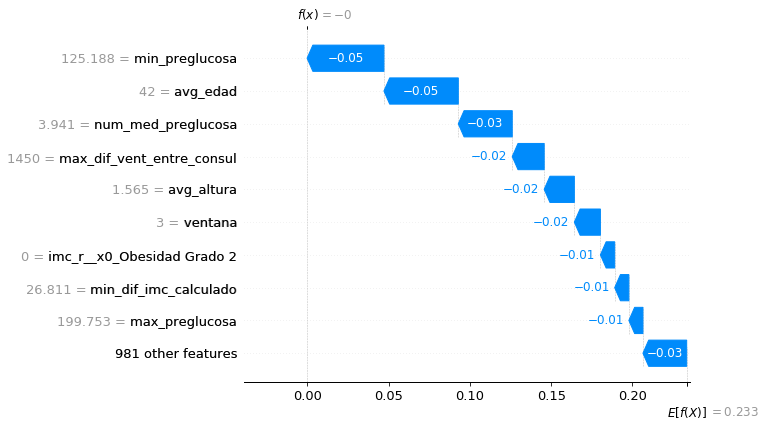

In [60]:
# train an XGBoost model
#X, y = shap.datasets.boston()
model = xgboost.XGBRegressor().fit(X_train, y_train)

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
explainer = shap.Explainer(model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

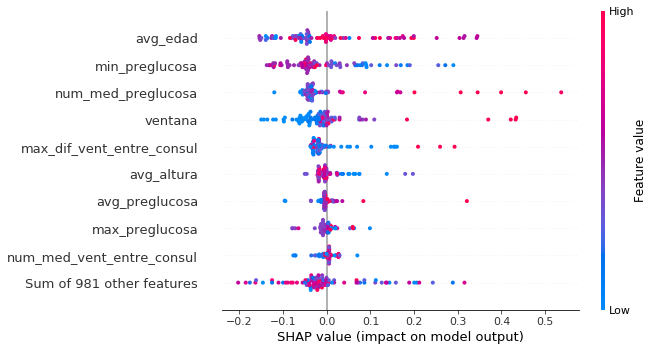

In [61]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

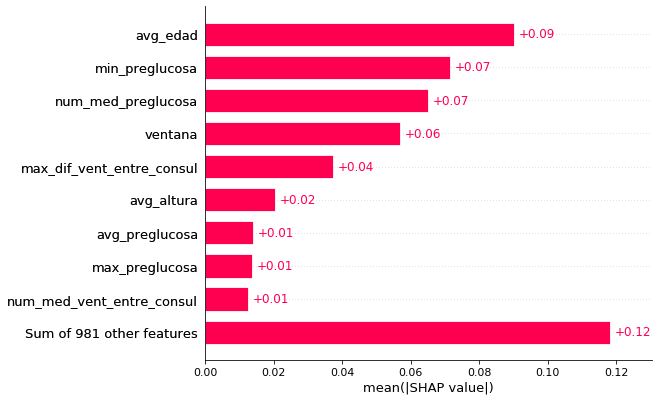

In [62]:
shap.plots.bar(shap_values)